In [7]:
%load_ext autoreload
%autoreload 2
% matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from tools import make_track, make_ER, ols_regression_PR, ols_regression, lasso_regression
from hc_graph import hc_stock
sns.set()

In [9]:
prices = pd.read_csv(r"financial_data/bnp_data.csv", index_col=0, parse_dates=True, dayfirst=True)[['BNPIFEU','BNPIFIT',
                            'BNPIFGE', 'BNPIFFR', 'BNPIFSP']]

prices_all = pd.read_csv(r"financial_data/bnp_data.csv", index_col=0, parse_dates=True, dayfirst=True)[['BNPIFEU',
                            'BNPIFUS', 'BNPIFJP', 'BNPIFCN', 'BNPIFFR', 'BNPIFGE', 'BNPIFGB', 'BNPIFCH', 'BNPIFKR',
                            'BNPIFUSC', 'BNPIFBR', 'BNPIFAU', 'BNPIFHK', 'BNPIFTW', 'BNPIFSG', 'BNPIFIT', 'BNPIFSP',
                            'BNPIFSW', 'BNPIFNE', 'BNPIFRU', 'BNPIFEM', 'BNPIFJT', 'BPFXEUR1', 'BPFXGBP1', 'BPFXCHF1',
                            'BPFXJPY1', 'BPFXAUD1', 'BPFXNZD1', 'BPFXNOK1', 'BPFXSEK1', 'BPFXCAD1', 'BPFXCZK1',
                            'BPFXPLN1', 'BPFXHUF1', 'BPFXTRY1', 'BPFXZAR1', 'BPFXSGD1', 'BPFXMXN1', 'BPFXINR1',
                            'BPFXKRW1', 'BPFXPHP1', 'BPFXTWD1', 'BPFXBRL1', 'BPFXCLP1', 'BPFXCOP1']]

returns = prices.resample("7D").first().pct_change().dropna()
returns_all = prices_all.resample("7D").first().pct_change().dropna()

In [16]:
sx5e = returns[["BNPIFEU"]]
bch = returns.drop("BNPIFEU", axis=1)
bch_all = returns_all.drop("BNPIFEU", axis=1)

size = 52
freq = 4
bounds = (-np.inf,np.inf)
total_weight = np.nan
l = 2.5

df_weight = ols_regression(sx5e, bch, size, freq, boundaries=bounds, weight_sum=total_weight)
df_weight_all = ols_regression(sx5e, bch_all, size, freq, boundaries=bounds, weight_sum=total_weight)
df_weight_lasso = lasso_regression(sx5e, bch_all, size, freq, boundaries=bounds, weight_sum=total_weight, l=l)
df_weight_lasso.head()

,BNPIFUS,BNPIFJP,BNPIFCN,BNPIFFR,BNPIFGE,BNPIFGB,BNPIFCH,BNPIFKR,BNPIFUSC,BNPIFBR,...,BPFXZAR1,BPFXSGD1,BPFXMXN1,BPFXINR1,BPFXKRW1,BPFXPHP1,BPFXTWD1,BPFXBRL1,BPFXCLP1,BPFXCOP1
2008-01-09,0.049141,-0.000018,-0.000033,0.182235,0.292049,7.022909e-03,0.000198,1.443218e-04,1.019300e-04,0.000124,...,2.676782e-04,0.000114,0.042600,0.000056,-0.000137,0.000381,-2.672181e-05,0.000127,-0.000157,0.000086
2008-02-06,0.000078,-0.000008,-0.000004,0.218248,0.346785,9.019256e-07,0.000005,4.833766e-06,1.019251e-05,0.000338,...,-8.784289e-07,0.000020,-0.000008,-0.000002,0.000009,0.000010,9.110945e-05,0.001446,0.000011,0.000023
2008-03-05,0.000031,-0.000014,-0.000052,0.225495,0.348540,6.757539e-05,0.000005,3.797444e-06,-1.673338e-05,0.000008,...,-9.961237e-06,0.000106,-0.000075,0.000291,0.000103,0.000125,-3.686693e-07,0.010577,0.000127,-0.000019
2008-04-02,0.000019,-0.000006,-0.006755,0.187649,0.355720,-1.509470e-05,0.000044,-5.510042e-07,9.433368e-07,-0.000008,...,2.668811e-05,0.000005,0.000089,0.000226,-0.295047,0.000088,-3.320628e-04,0.007609,0.000075,0.015565
2008-04-30,-0.000021,-0.000003,-0.020858,0.193096,0.347477,1.770029e-05,0.000080,-5.410344e-06,-2.077065e-05,-0.000002,...,-6.535351e-06,-0.000019,0.000165,-0.000048,-0.231160,-0.000035,-1.140185e-02,0.000207,0.000043,0.000064


In [17]:
prices_for_track = prices.loc[df_weight.index[0]:].drop("BNPIFEU", axis=1)
prices_for_track_all = prices_all.loc[df_weight_all.index[0]:].drop("BNPIFEU", axis=1)
replication = make_track(prices_for_track, df_weight)
replication_all = make_track(prices_for_track_all, df_weight_all)
replication_lasso = make_track(prices_for_track_all, df_weight_lasso)

df_res = prices.loc[replication.index][["BNPIFEU"]]
df_res["OLS"] = replication
df_res["OLS all"] = replication_all
df_res["Lasso"] = replication_lasso

df_res = df_res / df_res.iloc[0]
df_weight.head()

,BNPIFIT,BNPIFGE,BNPIFFR,BNPIFSP
2008-01-09,0.270562,0.272995,0.353088,0.147787
2008-02-06,0.319555,0.339598,0.261525,0.165816
2008-03-05,0.309851,0.338506,0.272591,0.164081
2008-04-02,0.146950,0.354218,0.350974,0.181240
2008-04-30,0.180476,0.351004,0.296572,0.209932


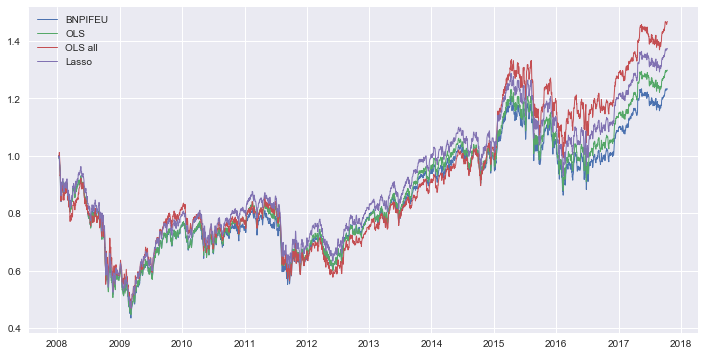

In [18]:
df_res.plot(figsize=(12,6),linewidth=1)

In [19]:
df_res.pct_change().corr(method="pearson")

,BNPIFEU,OLS,OLS all,Lasso
BNPIFEU,1.000000,0.987185,0.937688,0.986729
OLS,0.987185,1.000000,0.949081,0.999188
OLS all,0.937688,0.949081,1.000000,0.950213
Lasso,0.986729,0.999188,0.950213,1.000000


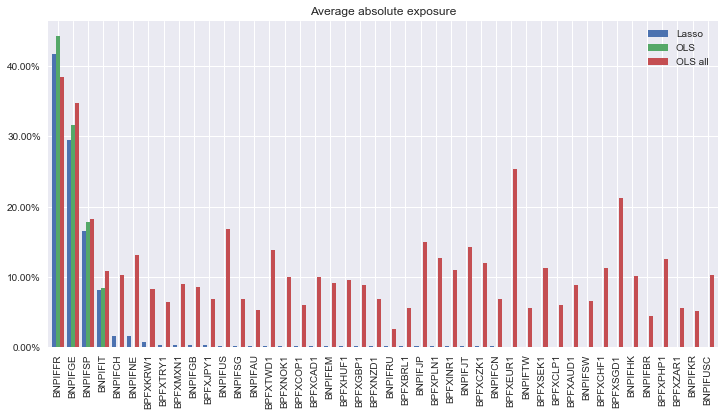

In [20]:
weight = pd.DataFrame(data={'Lasso': np.abs(df_weight_lasso).mean(axis=0).sort_values(ascending=False)})
weight['OLS'] = np.abs(df_weight).mean(axis=0)
weight['OLS all'] = np.abs(df_weight_all).mean(axis=0)
ax = weight.plot(kind='bar', title='Average absolute exposure', figsize=(12, 6), width=0.8)
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
plt.show()

In [21]:
size = 52
freq = 4
bounds = (-np.inf,np.inf)
total_weight = 1
l = 2.5

df_weight = ols_regression(sx5e, bch, size, freq, boundaries=bounds, weight_sum=total_weight)
df_weight_all = ols_regression(sx5e, bch_all, size, freq, boundaries=bounds, weight_sum=total_weight)
df_weight_lasso = lasso_regression(sx5e, bch_all, size, freq, boundaries=bounds, weight_sum=total_weight, l=l)
df_weight_lasso.head()

,BNPIFUS,BNPIFJP,BNPIFCN,BNPIFFR,BNPIFGE,BNPIFGB,BNPIFCH,BNPIFKR,BNPIFUSC,BNPIFBR,...,BPFXZAR1,BPFXSGD1,BPFXMXN1,BPFXINR1,BPFXKRW1,BPFXPHP1,BPFXTWD1,BPFXBRL1,BPFXCLP1,BPFXCOP1
2008-01-09,3.409998e-02,0.000013,-0.000053,0.216893,0.281967,0.015398,0.000073,0.000082,0.000011,0.000149,...,0.020425,-0.000300,0.000176,-0.000453,0.000157,0.000017,-0.079929,0.000430,4.144919e-04,0.000201
2008-02-06,3.403972e-07,-0.000032,-0.000054,0.228930,0.341736,0.000115,-0.000003,-0.000036,0.000005,0.001778,...,0.000006,-0.000153,-0.000026,-0.000063,-0.000742,-0.000086,-0.054764,0.004050,-4.084949e-05,-0.000026
2008-03-05,3.389183e-06,-0.000011,-0.000956,0.250161,0.337041,-0.000035,-0.000012,-0.000009,0.000010,0.000041,...,-0.000011,-0.000137,-0.005708,0.000002,-0.000012,-0.000023,-0.050145,0.000145,3.726954e-06,0.000007
2008-04-02,3.331386e-05,-0.000008,-0.017405,0.217223,0.350428,0.000024,0.000062,0.000011,0.000025,-0.000003,...,-0.000006,0.064498,0.051240,0.017473,-0.235849,0.000085,-0.000011,0.017621,-4.840221e-08,0.014739
2008-04-30,7.408159e-05,-0.000010,-0.023782,0.201873,0.348214,0.000026,0.000051,0.000004,0.000025,-0.000034,...,0.000032,0.000112,0.067538,0.000223,-0.173956,0.000213,-0.000215,0.001366,1.170487e-04,0.000052


In [22]:
prices_for_track = prices.loc[df_weight.index[0]:].drop("BNPIFEU", axis=1)
prices_for_track_all = prices_all.loc[df_weight_all.index[0]:].drop("BNPIFEU", axis=1)
replication = make_track(prices_for_track, df_weight)
replication_all = make_track(prices_for_track_all, df_weight_all)
replication_lasso = make_track(prices_for_track_all, df_weight_lasso)

df_res = prices.loc[replication.index][["BNPIFEU"]]
df_res["OLS"] = replication
df_res["OLS all"] = replication_all
df_res["Lasso"] = replication_lasso

df_res = df_res / df_res.iloc[0]
df_weight.head()

,BNPIFIT,BNPIFGE,BNPIFFR,BNPIFSP
2008-01-09,0.222013,0.266742,0.382067,0.129178
2008-02-06,0.167496,0.394303,0.306228,0.131973
2008-03-05,0.143581,0.389873,0.337787,0.128759
2008-04-02,0.101321,0.374463,0.367289,0.156927
2008-04-30,0.132260,0.372740,0.315051,0.179950


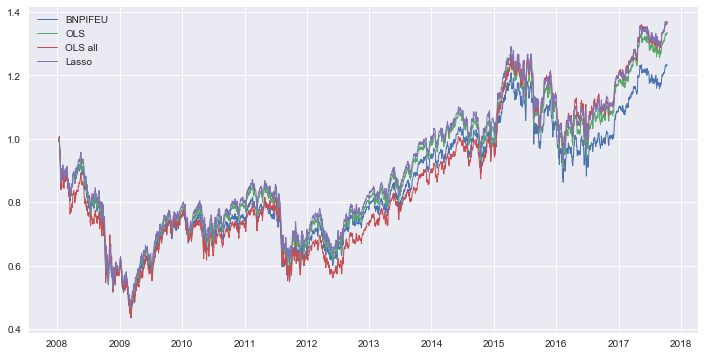

In [23]:
df_res.plot(figsize=(12,6),linewidth=1)

In [24]:
df_res.pct_change().corr(method="pearson")

,BNPIFEU,OLS,OLS all,Lasso
BNPIFEU,1.000000,0.986803,0.942540,0.986399
OLS,0.986803,1.000000,0.954418,0.998907
OLS all,0.942540,0.954418,1.000000,0.955441
Lasso,0.986399,0.998907,0.955441,1.000000


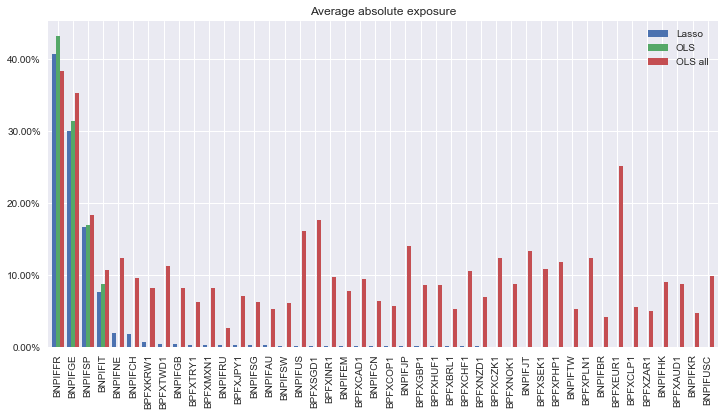

In [25]:
weight = pd.DataFrame(data={'Lasso': np.abs(df_weight_lasso).mean(axis=0).sort_values(ascending=False)})
weight['OLS'] = np.abs(df_weight).mean(axis=0)
weight['OLS all'] = np.abs(df_weight_all).mean(axis=0)
ax = weight.plot(kind='bar', title='Average absolute exposure', figsize=(12, 6), width=0.8)
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
plt.show()